# Making things simpler with MOABB (Part 3)

In this last part, we extend the previous example by assessing the classification score of not one but three classification pipelines. Once again, we begin by importing all the required packages to make the script work.

In [1]:
%matplotlib inline

import moabb
from moabb.datasets import BNCI2014001, Weibo2014, Zhou2016
from moabb.paradigms import LeftRightImagery
from moabb.evaluations import WithinSessionEvaluation

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import make_pipeline

from mne.decoding import CSP
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace
from pyriemann.classification import MDM

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mne
mne.set_log_level("CRITICAL")

moabb.set_log_level('info')
import warnings
warnings.filterwarnings("ignore")

Then, we instantiate the three different classiciation pipelines to be considered in the analysis. The object that gathers each pipeline is a dictionary.

In [2]:
pipelines = {}
pipelines['csp+lda'] = make_pipeline(CSP(n_components=8), LDA())
pipelines['tgsp+svm'] = make_pipeline(Covariances('oas'), TangentSpace(metric='riemann'), SVC(kernel='linear'))
pipelines['MDM'] = make_pipeline(Covariances('oas'), MDM(metric='riemann'))

The following lines go exactly as in the previous examples.

In [3]:
datasets = [BNCI2014001(), Zhou2016()]
paradigm = LeftRightImagery()
evaluation = WithinSessionEvaluation(paradigm=paradigm, datasets=datasets, overwrite=True)
results = evaluation.process(pipelines) 
results.to_csv('../results/results_part2-3.csv')

2019-09-16 15:12:56 tug-swl-f195.tugraz.at root[2736] INFO Processing dataset: 001-2014
2019-09-16 15:13:04 tug-swl-f195.tugraz.at root[2736] INFO csp+lda | 001-2014 | 1 | session_E: Score 0.952
2019-09-16 15:13:06 tug-swl-f195.tugraz.at root[2736] INFO tgsp+svm | 001-2014 | 1 | session_E: Score 0.966
2019-09-16 15:13:07 tug-swl-f195.tugraz.at root[2736] INFO MDM | 001-2014 | 1 | session_E: Score 0.951
2019-09-16 15:13:09 tug-swl-f195.tugraz.at root[2736] INFO csp+lda | 001-2014 | 1 | session_T: Score 0.919
2019-09-16 15:13:10 tug-swl-f195.tugraz.at root[2736] INFO tgsp+svm | 001-2014 | 1 | session_T: Score 0.939
2019-09-16 15:13:12 tug-swl-f195.tugraz.at root[2736] INFO MDM | 001-2014 | 1 | session_T: Score 0.939
2019-09-16 15:13:19 tug-swl-f195.tugraz.at root[2736] INFO csp+lda | 001-2014 | 2 | session_E: Score 0.642
2019-09-16 15:13:22 tug-swl-f195.tugraz.at root[2736] INFO tgsp+svm | 001-2014 | 2 | session_E: Score 0.659
2019-09-16 15:13:23 tug-swl-f195.tugraz.at root[2736] INFO MD

2019-09-16 15:15:57 tug-swl-f195.tugraz.at root[2736] INFO tgsp+svm | Zhou 2016 | 3 | session_1: Score 0.974
2019-09-16 15:15:58 tug-swl-f195.tugraz.at root[2736] INFO MDM | Zhou 2016 | 3 | session_1: Score 0.764
2019-09-16 15:15:59 tug-swl-f195.tugraz.at root[2736] INFO csp+lda | Zhou 2016 | 3 | session_2: Score 0.994
2019-09-16 15:16:00 tug-swl-f195.tugraz.at root[2736] INFO tgsp+svm | Zhou 2016 | 3 | session_2: Score 0.994
2019-09-16 15:16:00 tug-swl-f195.tugraz.at root[2736] INFO MDM | Zhou 2016 | 3 | session_2: Score 0.920
2019-09-16 15:16:08 tug-swl-f195.tugraz.at root[2736] INFO csp+lda | Zhou 2016 | 4 | session_0: Score 0.970
2019-09-16 15:16:09 tug-swl-f195.tugraz.at root[2736] INFO tgsp+svm | Zhou 2016 | 4 | session_0: Score 0.956
2019-09-16 15:16:09 tug-swl-f195.tugraz.at root[2736] INFO MDM | Zhou 2016 | 4 | session_0: Score 0.970
2019-09-16 15:16:10 tug-swl-f195.tugraz.at root[2736] INFO csp+lda | Zhou 2016 | 4 | session_1: Score 0.984
2019-09-16 15:16:11 tug-swl-f195.tugr

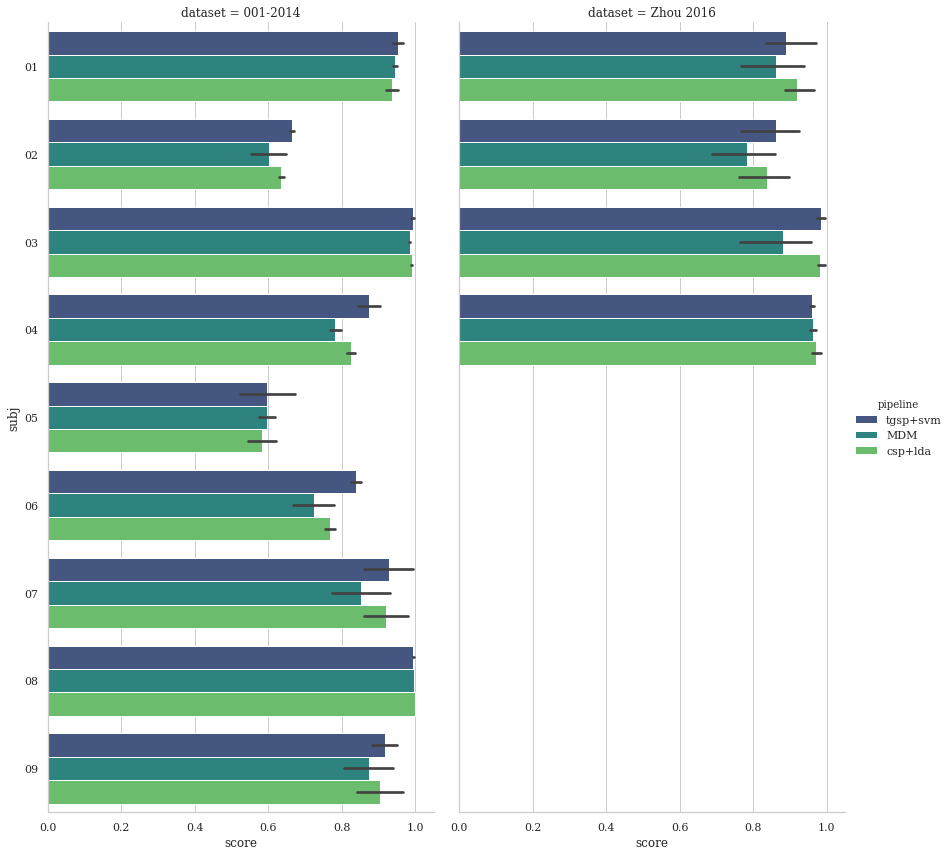

In [4]:
results = pd.read_csv('../results/results_part2-3.csv')
results["subj"] = [str(resi).zfill(2) for resi in results["subject"]]
g = sns.catplot(kind='bar', x="score", y="subj", hue="pipeline", col="dataset", height=12, aspect=0.5, data=results, orient='h', palette='viridis')

In [7]:
results

,Unnamed: 0,score,time,samples,subject,session,channels,n_sessions,dataset,pipeline,subj
0,0,0.966227,0.376786,144.0,1,session_E,22,2,001-2014,tgsp+svm,01
1,1,0.939297,0.332727,144.0,1,session_T,22,2,001-2014,tgsp+svm,01
2,2,0.658862,0.453647,144.0,2,session_E,22,2,001-2014,tgsp+svm,02
3,3,0.670748,0.336053,144.0,2,session_T,22,2,001-2014,tgsp+svm,02
4,4,0.989302,0.396703,144.0,3,session_E,22,2,001-2014,tgsp+svm,03
5,5,0.997333,0.398065,144.0,3,session_T,22,2,001-2014,tgsp+svm,03
6,6,0.904667,0.368333,144.0,4,session_E,22,2,001-2014,tgsp+svm,04
7,7,0.843506,0.335523,144.0,4,session_T,22,2,001-2014,tgsp+svm,04
8,8,0.671283,0.378843,144.0,5,session_E,22,2,001-2014,tgsp+svm,05
9,9,0.522676,0.383347,144.0,5,session_T,22,2,001-2014,tgsp+svm,05


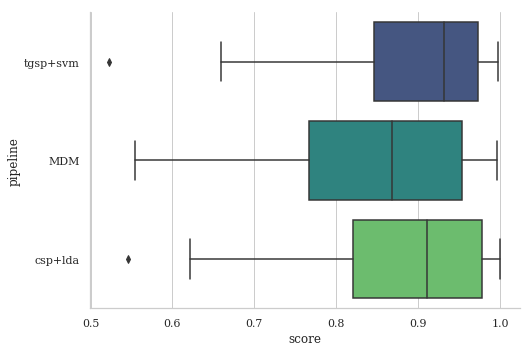

In [8]:
g = sns.catplot(kind="box", x="score", y="pipeline", aspect=1.5, data=results, orient='h', palette='viridis')

Until now, we have always plotted the results using the seaborn package and creating the figure by ourselves. MOABB also offers some functionalities for analysing the results obtained after running an evaluation procedure.

For instance, we may create a plot comparing the results with two classification algorithms as in:

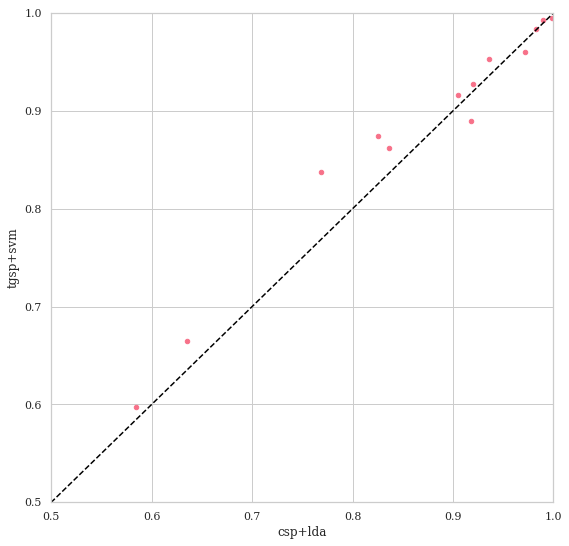

In [9]:
alg1 = 'csp+lda'
alg2 = 'tgsp+svm'
fig = moabb.analysis.plotting.paired_plot(results, alg1, alg2)
fig.set_size_inches(9,9)

N.B.: MOABB collapses the values from different sessions into a single average score, which is why we have the impression of having much less points than it should in the plot.

We may also do statistical analysis on the results and plot them with MOABB. For this, we need to first generate an auxiliary dataframe containing all the statistics describing the results and, then, use it as input.

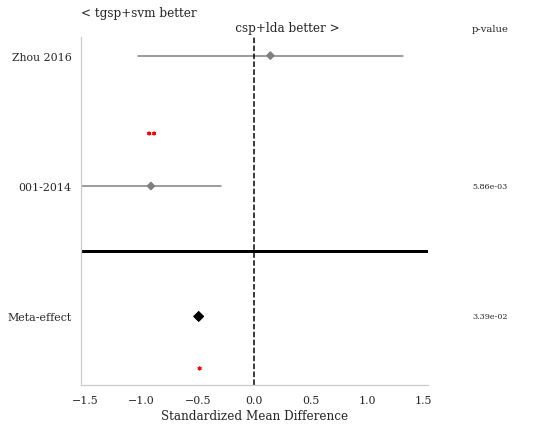

In [10]:
stats_df = moabb.analysis.meta_analysis.compute_dataset_statistics(results)
alg1 = 'csp+lda'
alg2 = 'tgsp+svm'
fig = moabb.analysis.plotting.meta_analysis_plot(stats_df, alg1, alg2)
fig.set_size_inches(8,7)